In [1]:
import os
currentDirectory = os.getcwd() #Get the directory of Current File
currentDirectory

'C:\\Users\\USER\\OneDrive\\Desktop\\AI_Final'

In [4]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

from tensorflow.keras.models import Sequential, save_model, load_model

In [5]:
# Load the model
model = load_model('saved_model/trained_model_CNN')


In [6]:
testing_data = []
IMG_SIZE = 50   #to resize the image

DATADIR2 = "dataset/test" # Folders that stores the testing data set
CATEGORIES = ["nonrecyclable", "recyclable"] #classes seperate in categories list

def create_testing_data():
    for category in CATEGORIES:  # do nonrecyclable and recyclable

        path = os.path.join(DATADIR2,category)  # create path to nonrecyclable and recyclable
        class_num = CATEGORIES.index(category)  # get the classification (0=nonrecyclable, 1=recyclable)

        for img in tqdm(os.listdir(path)):  # iterate over each image per nonrecyclable and recyclable
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_testing_data() #Run the method created

print(len(testing_data)) #Print the amount of testing data available


100%|██████████| 219/219 [00:01<00:00, 168.33it/s]

428


In [7]:
import random

random.shuffle(testing_data) #randomise the images

for sample in testing_data[:10]: # printing to show
    print(sample[1]) 

1
0
0
1
0
1
0
0
0
1


In [8]:
X = [] #list
y = [] #list

for features,label in testing_data:
    X.append(features) 
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # convert to array
y = np.array(y)

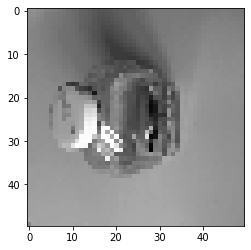

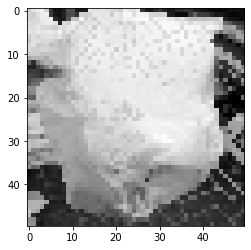

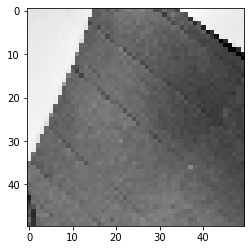

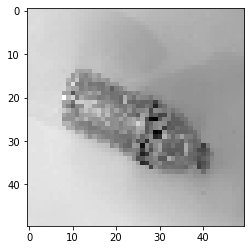

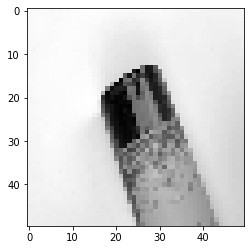

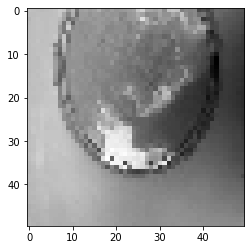

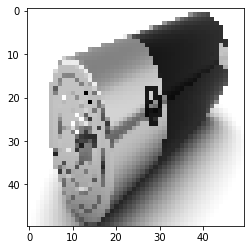

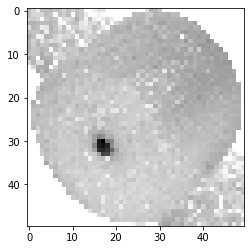

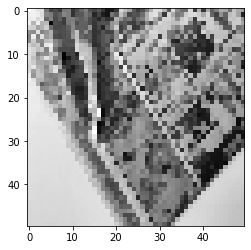

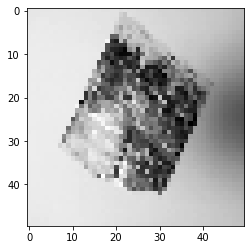

In [13]:
samples_to_predict = []
use_samples = [1,2,3,4,5,6,7,8,9,10] #The data/images chosen for model perdiction

# Generate plots for samples
for sample in use_samples:
    
  # Generate a plot and print the images that are selected for perdictions
  reshaped_image = X[sample].reshape((IMG_SIZE, IMG_SIZE))
  plt.imshow(reshaped_image, cmap='gray')
  plt.show() 
  # Add sample to array for prediction
  samples_to_predict.append(X[sample])

In [14]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(10, 50, 50, 1)


In [15]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.5557346e-14 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


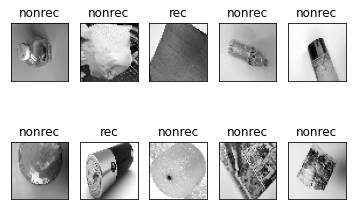

In [16]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)

fig=plt.figure() 
num = 0  # an integer type of variable

# Generate plots for samples
for sample in use_samples:
    
    num= num + 1 # 
    
    y = fig.add_subplot(2,5,num) # plot the arrangement of the images 
    reshaped_image = X[sample].reshape((IMG_SIZE, IMG_SIZE)) #Reshape the image to a particular size
    
    #If else statement to locate the correct label
    if classes[num-1] == 0 : str_label = "nonrec"
    if classes[num-1] == 1 : str_label = "rec"
  
    # Generate a plot
    reshaped_image = X[sample].reshape((50, 50))
    y.imshow(reshaped_image, cmap='gray')
    plt.title(str_label) #Print the Perdicted Label for each Image
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [18]:
# Live Camera
cam = cv2.VideoCapture(0) #0=front-cam, 1=back-cam
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1300)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1500)

# https://towardsdatascience.com/how-to-detect-objects-with-your-webcam-82693c47bd8

False